### Question 2
You have 2 categories of training data which are audio files (in folders), and 2 audio files which are unlabeled. The categories
are 'CategoryA' and 'CategoryB' while the unknown ones are 'CategoryU'. The objective is to predict whether the audio files in CategoryU are 'A' or 'B'.

a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU.
They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure
the spectrograms (2x2 subplots). (3 points)

b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the
performance changes. (3 points)

c) Apply GMM to the periodograms of each training category. There are difierent ways to approach this and one is to
take the average periodogram and fit the GMM to it. Then use the GMM models to assess the labels of the CategoryU files.
(3 points)

d) Use the periodogram data to make predictions for 'U' this time using PCA. If there are too many dimensions you can
reduce the resolution by smoothing and then subsampling. From PCA take the 2 largest axis of variance and then project
each training data point on that space with dierent colored markers. Then project the 2 data from the 'U' files on that
space to provide a conclusion for the labels of 'U' les. (3 points)

e) Apply another approach to compare (eg. decision trees or random forests) to make a prediction. (3 points)

In [1]:
cd("C:/Work/Project/STA7722/Assignment/Assgn2")

In [2]:
#import Pkg; 
#Pkg.add("DSP")
#Pkg.add("WAV")
#Pkg.add("ChemometricsTools")
#

In [3]:
using DSP, WAV
using Plots
#using Winston
#using PyPlot
# using AbstractFFTs
using ChemometricsTools
# using Shapefile
using Images, ImageMagick
# using StatsBase
# using Distances
# using Statistics
# using FFTW


In [4]:
#read files
Path_A = "./categoryA/"
fileWAV_A = readdir(Path_A)
Path_B = "./categoryB/"
fileWAV_B = readdir(Path_B)
Path_U = "./categoryU/"
fileWAV_U = readdir(Path_U)
println(size(fileWAV_A))
println(fileWAV_A)


(6,)
["DeeYanKey-Andante.wav", "background full (FREE DOWNLOAD)-1213771396.wav", "background music (FREE DOWNLOAD)-1219856890.wav", "hd audio background (FREE DOWNLOAD)-1213766218.wav", "play background (FREE DOWNLOAD)-1219852972.wav", "your background (FREE DOWNLOAD)-1219830094.wav"]


### a) Display the 'periodogram' and 'spectrogram' for 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU. They should be presented in 2 figures where the first figure shows only the periodograms (2x2 subplots) and the other figure the spectrograms (2x2 subplots). (3 points)

In [5]:
#get a full path for each file inside the folder
fileWAV_A2 = [string(Path_A,fileWAV_A[ii]) for ii in 1:length(fileWAV_A)]
fileWAV_B2 = [string(Path_B,fileWAV_B[ii]) for ii in 1:length(fileWAV_B)]
fileWAV_U2 = [string(Path_U,fileWAV_U[ii]) for ii in 1:length(fileWAV_U)]

2-element Vector{String}:
 "./categoryU/Synth-wave-with-metal-guitar.wav"
 "./categoryU/The Fairy's Kiss _FREE DOWNLOAD-111190096.wav"

In [6]:
#Read the WAV file, make it into a vector
SSA1, FramesSECA1 = wavread(fileWAV_A2[1])#for non-normalized amplitude#, format="native")
SSA1 = vec(SSA1)
SSA1_NUM = length(SSA1)

SSB1, FramesSECB1 = wavread(fileWAV_B2[1])#for non-normalized amplitude#, format="native")
SSB1 = vec(SSB1)
SSB1_NUM = length(SSB1)

SSU1, FramesSECU1 = wavread(fileWAV_U2[1])#for non-normalized amplitude#, format="native")
SSU1 = vec(SSU1)
SSU1_NUM = length(SSU1)

SSU2, FramesSECU2 = wavread(fileWAV_U2[2])#for non-normalized amplitude#, format="native")
SSU2 = vec(SSU2)
SSU2_NUM = length(SSU2)
println("SampleNum=",size(SSA1),", length of the samples=",SSA1_NUM,
    " frame-rate=",FramesSECA1)

SampleNum=(6517280,), length of the samples=6517280 frame-rate=16000.0


In [7]:
#min(SSA1_NUM,SSB1_NUM,SSU1_NUM,SSU2_NUM)
# SSA1_NUM
size(SSU2)

(11708928,)

In [8]:
#Produce a spectrogram of the audio
sampleInterval = 100
resolutionWin = 1000
smooth = 50
spgrmA1 = DSP.Periodograms.spectrogram(SSA1[1:sampleInterval:end],
       resolutionWin, smooth, fs=FramesSECA1, window=DSP.Windows.hamming)
spgrmB1 = DSP.Periodograms.spectrogram(SSB1[1:sampleInterval:end],
       resolutionWin, smooth, fs=FramesSECB1, window=DSP.Windows.hamming)
spgrmU1 = DSP.Periodograms.spectrogram(SSU1[1:sampleInterval:end],
       resolutionWin, smooth, fs=FramesSECU1, window=DSP.Windows.hamming)
spgrmU2 = DSP.Periodograms.spectrogram(SSU2[1:sampleInterval:end],
       resolutionWin, smooth, fs=FramesSECU2, window=DSP.Windows.hamming)

DSP.Periodograms.Spectrogram{Float64, AbstractFFTs.Frequencies{Float32}, Matrix{Float64}}([7.158628311692767e-13 1.3625254328406907e-7 … 6.424685864217548e-14 4.118427186546383e-13; 4.067601665056796e-12 1.3574115287967293e-7 … 1.5646974034011614e-13 4.535560540976692e-13; … ; 6.53350498519207e-12 9.46492734484808e-9 … 2.2056041329086447e-13 2.997503679708745e-14; 2.7729362696904896e-12 6.593817879285637e-9 … 3.497181230660633e-14 2.7022011080191496e-14], Float32[0.0, 44.1, 88.2, 132.29999, 176.4, 220.5, 264.59998, 308.69998, 352.8, 396.9  …  21653.1, 21697.2, 21741.299, 21785.398, 21829.5, 21873.6, 21917.7, 21961.799, 22005.898, 22050.0], 0.011337868480725623:0.021541950113378686:2.639455782312925)

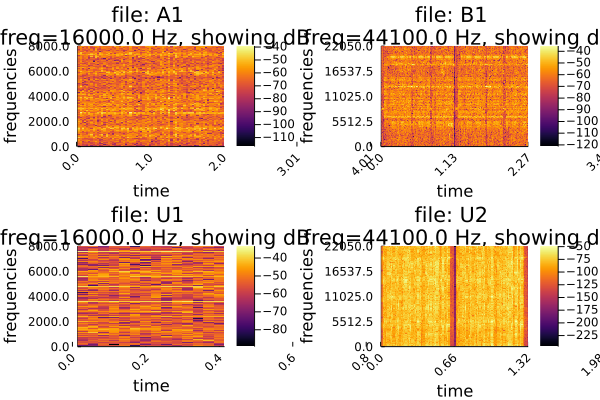

In [9]:
hmapA1 = heatmap( pow2db.(spgrmA1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmA1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmA1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmA1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmA1.time),length=5),digits=2)))  ,legend=true, 
     title="file: A1 \n freq=$(FramesSECA1) Hz, showing dB")
hmapB1 = heatmap( pow2db.(spgrmB1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmB1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmB1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmB1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmB1.time),length=5),digits=2)))  ,legend=true, 
     title="file: B1 \n freq=$(FramesSECB1) Hz, showing dB")
hmapU1 = heatmap( pow2db.(spgrmU1.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU1.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU1.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU1.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU1.time),length=5),digits=2)))  ,legend=true, 
     title="file: U1 \n freq=$(FramesSECU1) Hz, showing dB")
hmapU2 = heatmap( pow2db.(spgrmU2.power),xlabel="time",xrotation=45,          
              yticks=(range(0,stop=spgrmU2.freq.n,length=5),
                  string.(range(0,stop=maximum(Int.(round.(spgrmU2.freq))),length=5)))   ,ylabel="frequencies",
     xticks=( round.(range(0,stop=2*length(spgrmU2.time),length=5),digits=2),
             string.(round.(range(0,stop=maximum(spgrmU2.time),length=5),digits=2)))  ,legend=true, 
     title="file: U2 \n freq=$(FramesSECU2) Hz, showing dB")


pA1 = plot(hmapA1);pB1= plot(hmapB1);pU1= plot(hmapU1);pU2= plot(hmapU2)

p1 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2))


savefig(p1,"figs/fig1Spectrogram.png")
display("image/png", p1)

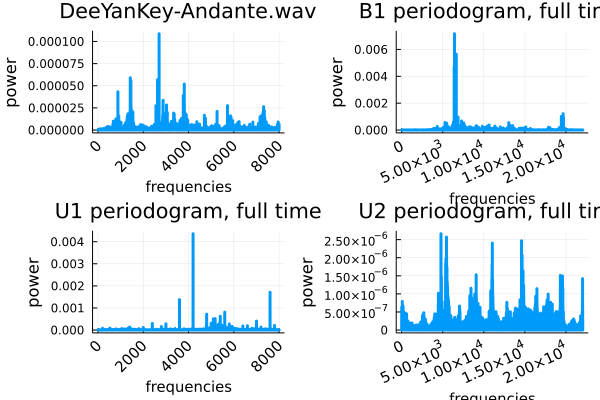

In [10]:
#the periodogram 
# power spectral density (PSD)

prdgrmFULLA1 = DSP.Periodograms.periodogram(SSA1[1:sampleInterval:end], fs=FramesSECA1, window=DSP.Windows.hamming)
pA1 = plot(prdgrmFULLA1.freq,prdgrmFULLA1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=10,xtickfontsize=10,ylabel="power",
                title=fileWAV_A[1])
prdgrmFULLB1 = DSP.Periodograms.periodogram(SSB1[1:sampleInterval:end], fs=FramesSECB1, window=DSP.Windows.hamming)
pB1 = plot(prdgrmFULLB1.freq,prdgrmFULLB1.power,legend=false,linewidth=3,xrotation=25,         
               xlabel="frequencies",xguidefontsize=10,xtickfontsize=10,ylabel="power",
                title="B1 periodogram, full time")
prdgrmFULLU1 = DSP.Periodograms.periodogram(SSU1[1:sampleInterval:end], fs=FramesSECU1, window=DSP.Windows.hamming)
pU1 = plot(prdgrmFULLU1.freq,prdgrmFULLU1.power,legend=false,linewidth=3,xrotation=45,         
               xlabel="frequencies",xguidefontsize=10,xtickfontsize=10,ylabel="power",
                title="U1 periodogram, full time")
prdgrmFULLU2 = DSP.Periodograms.periodogram(SSU2[1:sampleInterval:end], fs=FramesSECU2, window=DSP.Windows.hamming)
pU2 = plot(prdgrmFULLU2.freq,prdgrmFULLU2.power,legend=false,linewidth=3,xrotation=25,         
               xlabel="frequencies",xguidefontsize=10,xtickfontsize=10,ylabel="power",
                title="U2 periodogram, full time")
p2 = plot(pA1,pB1,pU1,pU2,layout=grid(2,2))

#savefig(p2,"figs/songPeriodogramFULL")
display("image/png", p2) 

### b) Use KNN on the periodogram data to find the labels of the files 'U' and explore difierent values of 'K' to see how the performance changes. (3 points)

In [11]:
#Make an aggregate from 1 file in CategoryA, 1 file in CategoryB, and the 2 files in CategoryU
